In [12]:
import os
print(os.getcwd())


D:\iCloudDrive\analisis-predictivo-gestion-datos\session-01\notebooks


#  TRABAJO FINAL DE ANÁLISIS PREDICTIVO
###  Predicción del rango de edad en suicidios (Colombia, 2015–2023)



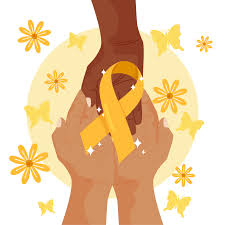

In [3]:
from IPython.display import Image
Image('/workspaces/suicidio/Banco imagenes/suici.jpg')

## Objetivo del Proyecto ##
Desarrollar un modelo de análisis predictivo basado en aprendizaje automático que permita predecir el grupo de edad de las víctimas de suicidio en Colombia, a partir de variables socio-demográficas como el sexo, estado civil, escolaridad, ciclo vital y causa probable del suicidio, con el fin de identificar patrones relevantes que puedan apoyar estrategias de prevención diferenciadas según la etapa de la vida.



## Problema elegido:

Predecir el grupo de edad de una víctima de suicidio en Colombia con base en factores personales y sociales como estado civil, escolaridad, sexo, razón del suicidio, entre otros.

## Justificación:

El análisis por rangos de edad permite detectar qué características están más relacionadas con el suicidio en diferentes etapas de la vida.

### Paso 1: Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [3]:

df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia__2015_a_2023._Cifras_definitivas_20250516.csv')
df.head()

,ID,Año del hecho,Grupo de edad de la victima,Grupo Mayor Menor de Edad,Edad judicial,Ciclo Vital,Sexo de la victima,Estado Civil,País de Nacimiento de la Víctima,Escolaridad,...,Presunto Agresor,Condición de la Víctima,Medio de Desplazamiento o Transporte,Servicio del Vehículo,Clase o Tipo de Accidente,Objeto de Colisión,Servicio del Objeto de Colisión,Razón del Suicidio,Localidad del Hecho,Ancestro Racial
0,1,2015,(18 a 19),b) Mayores de Edad (>18 años),(18 a 19),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Indigena
1,2,2015,(25 a 29),b) Mayores de Edad (>18 años),(25 a 28),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Conflicto con pareja o ex pareja,No aplica,Mestizo
2,3,2015,(35 a 39),b) Mayores de Edad (>18 años),(35 a 39),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Conflicto con pareja o ex pareja,No aplica,Mestizo
3,4,2015,(55 a 59),b) Mayores de Edad (>18 años),(55 a 59),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Mestizo
4,5,2015,(45 a 49),b) Mayores de Edad (>18 años),(45 a 49),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Mestizo


### Paso 3: Revisar estructura del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    23544 non-null  int64 
 1   Año del hecho                         23544 non-null  int64 
 2   Grupo de edad de la victima           23544 non-null  object
 3   Grupo Mayor Menor de Edad             23544 non-null  object
 4   Edad judicial                         23544 non-null  object
 5   Ciclo Vital                           23544 non-null  object
 6   Sexo de la victima                    23544 non-null  object
 7   Estado Civil                          23544 non-null  object
 8   País de Nacimiento de la Víctima      23544 non-null  object
 9   Escolaridad                           23544 non-null  object
 10  Pertenencia Grupal                    23544 non-null  object
 11  Mes del hecho               

### Paso 4: Descripción estadística general

In [5]:
df.describe(include='all')

,ID,Año del hecho,Grupo de edad de la victima,Grupo Mayor Menor de Edad,Edad judicial,Ciclo Vital,Sexo de la victima,Estado Civil,País de Nacimiento de la Víctima,Escolaridad,...,Presunto Agresor,Condición de la Víctima,Medio de Desplazamiento o Transporte,Servicio del Vehículo,Clase o Tipo de Accidente,Objeto de Colisión,Servicio del Objeto de Colisión,Razón del Suicidio,Localidad del Hecho,Ancestro Racial
count,23544.000000,23544.000000,23544,23544,23544,23544,23544,23544,23544,23544,...,23544,23544,23544,23544,23544,23544,23544,23544,23544,23544
unique,NaN,NaN,17,2,17,6,2,7,34,12,...,1,1,1,1,1,1,1,21,23,8
top,NaN,NaN,(20 a 24),b) Mayores de Edad (>18 años),(20 a 24),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Mestizo
freq,NaN,NaN,3413,21041,3413,10258,18928,11115,22973,6291,...,23544,23544,23544,23544,23544,23544,23544,12444,20171,19524
mean,11772.500000,2019.271577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6796.711705,2.574016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5886.750000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11772.500000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,17658.250000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1: Distribución por Género

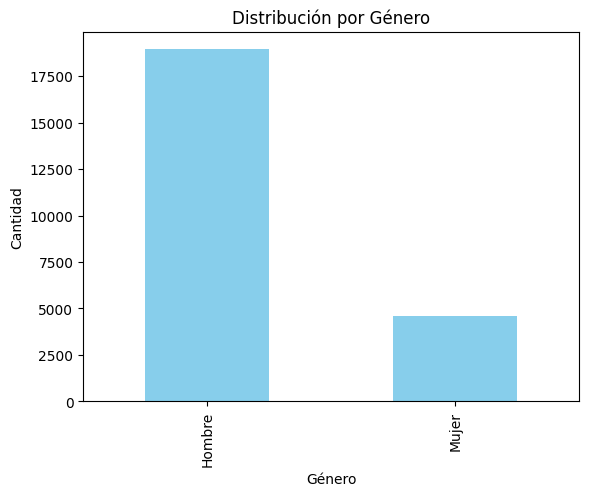

In [11]:
df['Sexo de la victima'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

### Gráfico 2: Histograma de edades

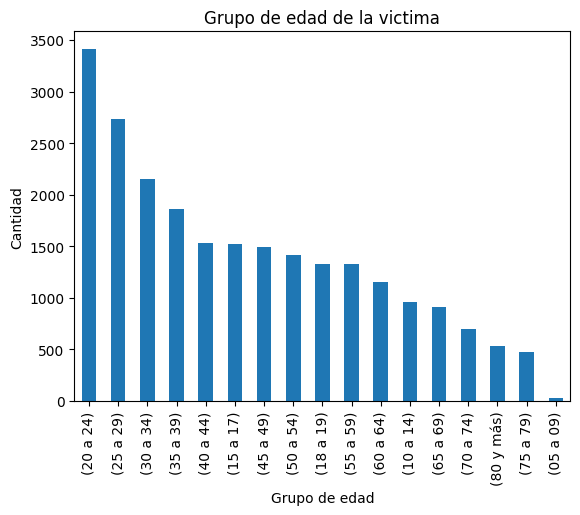

In [15]:
df['Grupo de edad de la victima'].value_counts().plot(kind='bar')
plt.title('Grupo de edad de la victima')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.show()


# **Interpretación:**

## *El histograma muestra la frecuencia de edades. Podemos ver la forma de la distribución y posibles sesgos.*

### Gráfico 3: Boxplot de ingreso por género

In [21]:
df['Estado Civil'] = df['Estado Civil'].astype(str)
df['Sexo de la victima'] = df['Sexo de la victima'].astype(str)

In [23]:
df = df.dropna(subset=['Estado Civil', 'Sexo de la victima'])


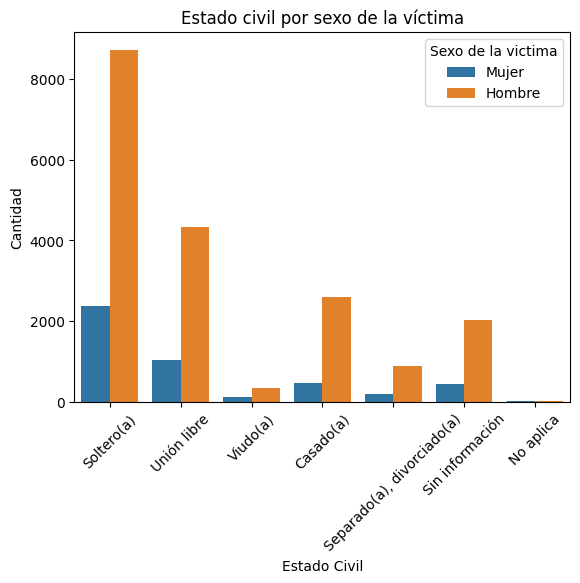

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Estado Civil', hue='Sexo de la victima')
plt.title('Estado civil por sexo de la víctima')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


*Interpretación: El boxplot permite comparar la distribución del ingreso entre grupos de género, y detectar posibles outliers.*

# Evaluación Predictiva antes y después de la Limpieza de Datos

Este notebook tiene como objetivo comparar el desempeño de un modelo predictivo utilizando un conjunto de datos antes y después de aplicar una limpieza adecuada.

Analizaremos el impacto de la imputación, codificación y escalado de variables, mostrando cómo cada decisión afecta la calidad del modelo.

La variable objetivo será Alta_conectividad, una clasificación binaria basada en el tiempo de uso de internet por día.

